# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Dandiset Overview

This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.


**Dandiset ID:** 001354

**Version:** 0.250312.0036

**Link:** https://dandiarchive.org/dandiset/001354/0.250312.0036

This notebook will cover:

1. Loading the Dandiset using the DANDI API.
2. Loading a specific NWB file from the Dandiset.
3. Exploring the metadata of the loaded NWB file.
4. Visualizing some data from the NWB file.

## Required Packages

To run this notebook, you need the following packages installed:

* dandi (and its dependencies)
* pynwb (and its dependencies)
* h5py
* remfile
* matplotlib
* numpy

## Loading the Dandiset

We can use the `dandi` Python client to access Dandisets.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036

First 5 assets:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97)


## Loading an NWB File

We will load the NWB file located at:
`sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`

The corresponding URL for this asset is:
`https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/`

We can load this file using `pynwb`, `h5py`, and `remfile`.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some basic metadata from the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age Reference: {nwb.subject.age__reference}")
print(f"Date of Birth: {nwb.subject.date_of_birth}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: Intracellular electrophysiology experiment.
Identifier: pk2024_07_17_0001
Session Start Time: 2024-07-17 15:08:30-07:00
Subject ID: PK-109
Species: Mus musculus
Sex: F
Age Reference: birth
Date of Birth: 2024-04-07 00:00:00-07:00


## Exploring NWB File Contents

The NWB file contains intracellular electrophysiology data. The primary data are stored in the `acquisition` group, and stimulation data is in the `stimulus` group.

Here's a summary of some of the data available:

*   `icephys_electrodes`: Information about the intracellular electrodes.
*   `acquisition`: Contains `CurrentClampSeries` data for response recordings. There are multiple recordings (e.g., `current_clamp-response-XX-ch-Y`) each with `data`, `starting_time`, `rate`, `unit`, etc.
*   `stimulus`: Contains `CurrentClampStimulusSeries` data for the applied stimuli. Similar structure to `acquisition`.
*   `icephys_simultaneous_recordings`: Table grouping simultaneous recordings.
*   `icephys_sequential_recordings`: Table grouping sequential recordings, including stimulus type.

There are many current clamp response and stimulus series recorded, labeled `current_clamp-response-XX-ch-Y` and `stimulus-XX-ch-Y`, where XX is a sweep number and Y is the channel.

## Visualizing Data

Let's visualize the response and stimulus data for one of the sweeps, for example sweep 1, channel 0.

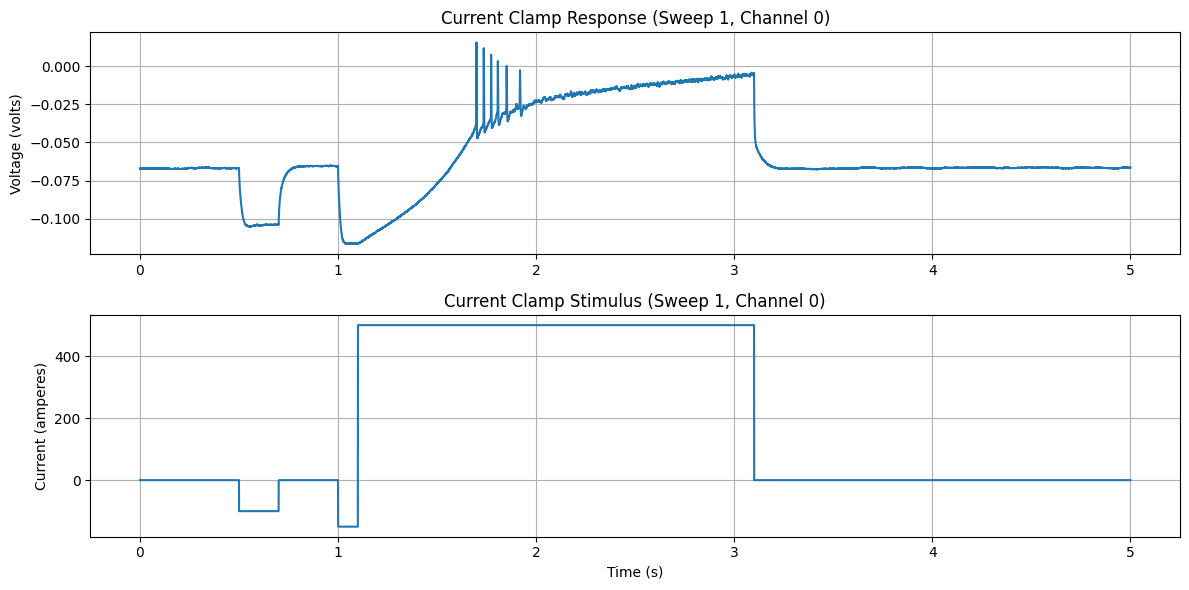

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Select acquisition and stimulus data for sweep 1, channel 0
acquisition_data = nwb.acquisition["current_clamp-response-01-ch-0"]
stimulus_data = nwb.stimulus["stimulus-01-ch-0"]

# Get properties
rate = acquisition_data.rate
starting_time = acquisition_data.starting_time
conversion = acquisition_data.conversion
response_unit = acquisition_data.unit
stimulus_unit = stimulus_data.unit

# Load a subset of data for plotting to avoid excessive memory usage
# We will load the first 10 seconds of data
num_points_to_load = int(10 * rate)
if num_points_to_load > acquisition_data.data.shape[0]:
    num_points_to_load = acquisition_data.data.shape[0]

response_data_subset = acquisition_data.data[0:num_points_to_load] * conversion
stimulus_data_subset = stimulus_data.data[0:num_points_to_load] # stimulus data is float64 and conversion is 1e-12, don't multiply by conversion unless units are converted from A to pA or something similar

# Create time vector for the subset
time_subset = np.arange(0, num_points_to_load) / rate + starting_time

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_subset, response_data_subset)
plt.ylabel(f"Voltage ({response_unit})")
plt.title("Current Clamp Response (Sweep 1, Channel 0)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_subset, stimulus_data_subset)
plt.ylabel(f"Current ({stimulus_unit})")
plt.xlabel("Time (s)")
plt.title("Current Clamp Stimulus (Sweep 1, Channel 0)")
plt.grid(True)

plt.tight_layout()
plt.show()

## Analyzing Across Sweeps

We can iterate through the acquisition and stimulus series to plot responses and stimuli for different sweeps or channels. Let's plot the responses for the first few sweeps on channel 0.

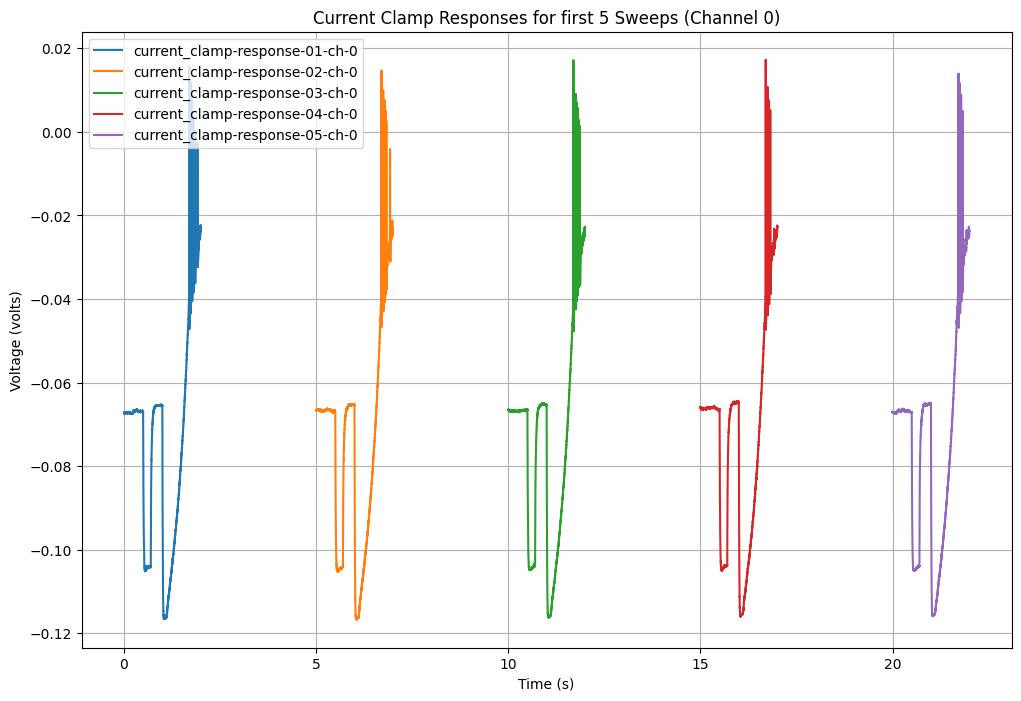

In [4]:
plt.figure(figsize=(12, 8))

# Get all acquisition series for channel 0
acquisition_series_ch0 = {k: v for k, v in nwb.acquisition.items() if 'ch-0' in k}
stimulus_series_ch0 = {k: v for k, v in nwb.stimulus.items() if 'ch-0' in k}

# Plot first 5 responses
for name, data_series in islice(acquisition_series_ch0.items(), 5):
    rate = data_series.rate
    starting_time = data_series.starting_time
    conversion = data_series.conversion
    unit = data_series.unit

    # Load a subset of data (e.g., first 2 seconds)
    num_points_to_load = int(2 * rate)
    if num_points_to_load > data_series.data.shape[0]:
        num_points_to_load = data_series.data.shape[0]

    data_subset = data_series.data[0:num_points_to_load] * conversion
    time_subset = np.arange(0, num_points_to_load) / rate + starting_time

    plt.plot(time_subset, data_subset, label=name)

plt.xlabel("Time (s)")
plt.ylabel(f"Voltage ({unit})")
plt.title("Current Clamp Responses for first 5 Sweeps (Channel 0)")
plt.legend()
plt.grid(True)
plt.show()

Let's also plot the corresponding stimuli.

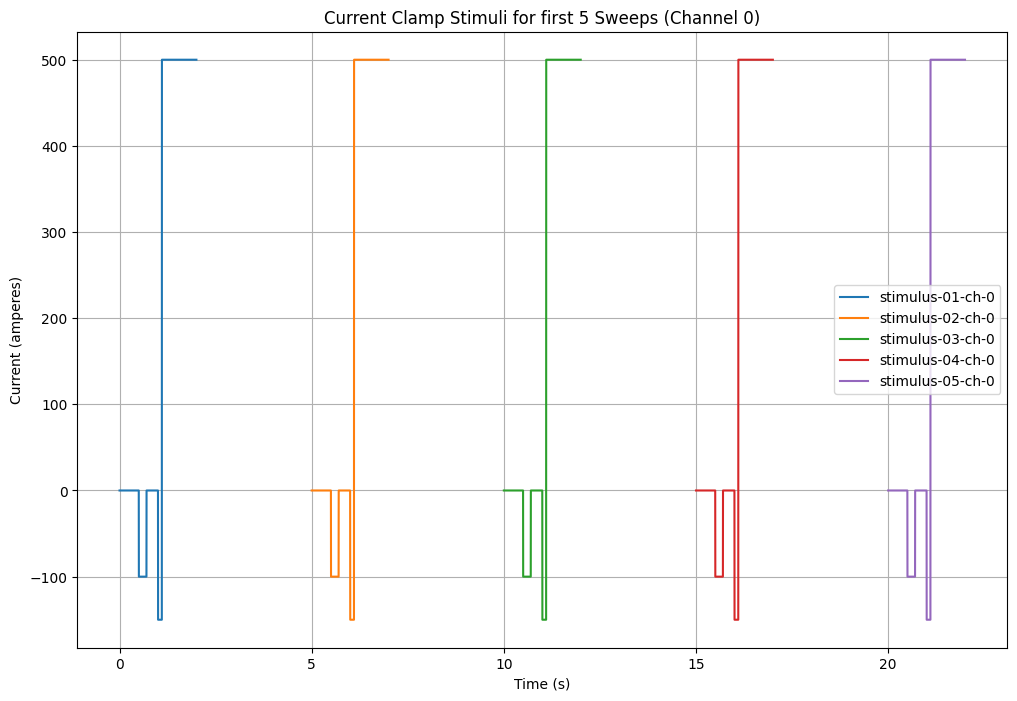

In [5]:
plt.figure(figsize=(12, 8))

# Plot first 5 stimuli on channel 0
for name, data_series in islice(stimulus_series_ch0.items(), 5):
    rate = data_series.rate
    starting_time = data_series.starting_time
    unit = data_series.unit

    # Load a subset of data (e.g., first 2 seconds)
    num_points_to_load = int(2 * rate)
    if num_points_to_load > data_series.data.shape[0]:
        num_points_to_load = data_series.data.shape[0]

    data_subset = data_series.data[0:num_points_to_load] # Stimulus data is float64, no conversion needed unless units are scaled
    time_subset = np.arange(0, num_points_to_load) / rate + starting_time

    plt.plot(time_subset, data_subset, label=name)

plt.xlabel("Time (s)")
plt.ylabel(f"Current ({unit})")
plt.title("Current Clamp Stimuli for first 5 Sweeps (Channel 0)")
plt.legend()
plt.grid(True)
plt.show()

## Summarizing Findings and Future Directions

This notebook demonstrated how to access and visualize intracellular electrophysiology data from Dandiset 001354 using the DANDI API, PyNWB, and other related libraries. We were able to load a specific NWB file, explore its basic metadata, and plot the raw voltage responses and applied current stimuli for individual sweeps. We also showed how to plot responses and stimuli from multiple sweeps for comparison.

Possible future directions for analysis could include:

* Characterizing the different stimulus types applied.
* Analyzing the detailed shape and characteristics of the neuronal responses (e.g., peak voltage, half-width
).
* Comparing responses across different cells and experimental conditions within the Dandiset.
* Extracting features related to action potential firing.